## 1. 데이터 불러오기

In [1]:
import pandas as pd
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## 2. 데이터 전처리

In [2]:
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

### 2-1. 결측치 제거

In [3]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
df = df.dropna(axis=0)
df.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

### 2-2. Year 네자리 수로 만들고 정수형으로 바꾸기

In [5]:
def modify_year(year):      #연도 수정하는 함수
  year = int(year)
  if year <= 22:
    return year + 2000
  elif 22 < year < 1000:
    return year + 1900
  else:
    return year

df['Year'] = df['Year'].apply(modify_year)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 2-3. 판매량 단위 통일

In [6]:
def modify_sales(sales):        #판매량 수정하는 함수
  if 'M' in sales:
    return float(sales.replace('M', ''))
  elif 'K' in sales:
    return float(sales.replace('K', '')) * 0.001
  else:
    return float(sales)

df['NA_Sales'] = df['NA_Sales'].apply(modify_sales)
df['EU_Sales'] = df['EU_Sales'].apply(modify_sales)
df['JP_Sales'] = df['JP_Sales'].apply(modify_sales)
df['Other_Sales'] = df['Other_Sales'].apply(modify_sales)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 2-4. 전처리 확인

In [7]:
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

## 3. 지역에 따라서 선호하는 게임 장르가 다를까?

### 3-1. 지역에 따른 장르별 판매량 dataframe 생성

In [8]:
df_genre = df.groupby('Genre').sum()
df_genre = df_genre[["NA_Sales","EU_Sales","JP_Sales", "Other_Sales"]]
df_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


### 3-2. 시각화

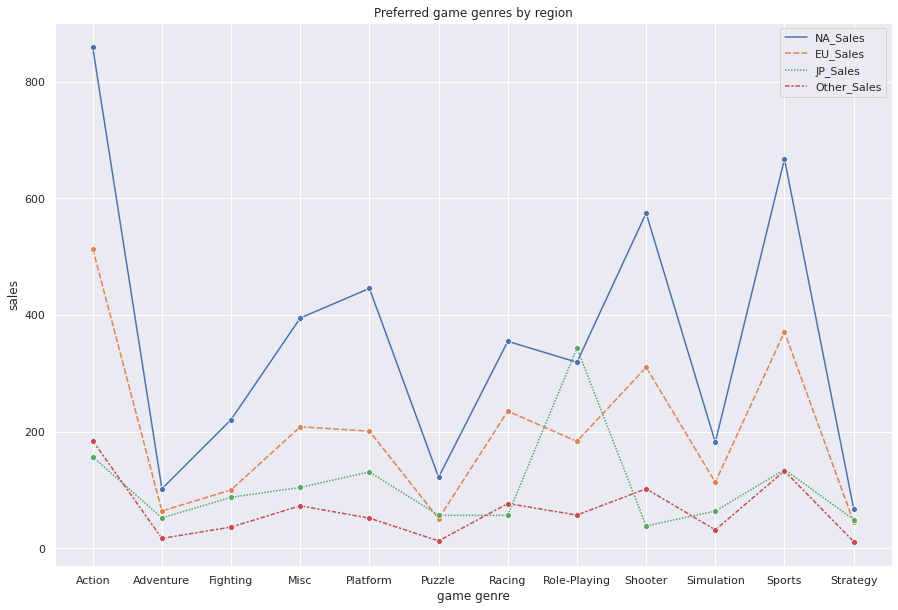

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.title("Preferred game genres by region")
plt.xlabel("game genre")
plt.ylabel("sales")

sns.lineplot(data=df_genre, marker='o');

### 3-3. 결과
*   북미, 유럽, 그외 지역은 1위: Action, 2위: Sports, 3위: shooter로 선호하는 게임 장르가 비슷하다.
*   일본만 1위 게임장르가 Role-Playing이다.



## 4. 연도별 게임의 트렌드가 있을까?

### 4-1. Feature Engineering 통해 'Total_Sales' column 생성

In [10]:
df["Total_Sales"] = df["NA_Sales"] + df["EU_Sales"] + df["JP_Sales"] + df["Other_Sales"]
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


## 4-2. 연도별 가장 많이 팔린 게임 장르 dataframe 생성

In [11]:
year_genre = pd.DataFrame(df.groupby(['Year','Genre'])["Total_Sales"].sum())
year_genre = year_genre.reset_index()
year_genre

,Year,Genre,Total_Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1981,Action,14.79
...,...,...,...
383,2016,Sports,14.63
384,2016,Strategy,0.52
385,2017,Action,0.01
386,2017,Role-Playing,0.04


In [12]:
year_genre_max = pd.DataFrame(year_genre.groupby(['Year']).max())
year_genre_max

,Genre,Total_Sales
Year,,
1980,Shooter,7.07
1981,Sports,14.79
1982,Sports,10.04
1983,Sports,6.93
1984,Sports,31.10
1985,Sports,43.17
1986,Sports,13.74
1987,Sports,5.42
1988,Sports,27.73


## 4-3. 시각화

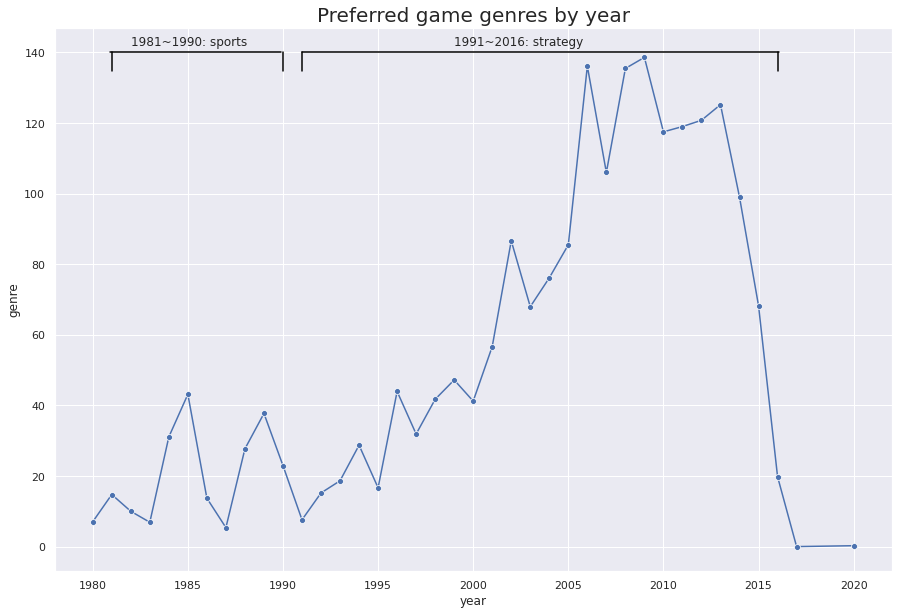

In [13]:
# sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.title("Preferred game genres by year", fontsize = 20)
plt.xlabel("year")
plt.ylabel("genre")
plt.axhline(140, 0.066, 0.27, color = 'black')
plt.axhline(140, 0.295,0.865, color = 'black')
plt.axvline(x=1981, ymin=0.92, ymax=0.955, color='black')
plt.axvline(x=1990, ymin=0.92, ymax=0.955, color='black')
plt.axvline(x=1991, ymin=0.92, ymax=0.955, color='black')
plt.axvline(x=2016, ymin=0.92, ymax=0.955, color='black')

plt.text(1982, 142, '1981~1990: sports')
plt.text(1999, 142, '1991~2016: strategy')
sns.lineplot(x='Year', y='Total_Sales', data=year_genre_max, marker='o');

## 4-4: 결과
*   1981년~1990년에는 sports 장르의 게임이 유행한다.
*   1991~2016까지는 strategy 장르의 게임이 유행한다.
*   그 이후에는 결측치로 인해 제거된 데이터가 많아 데이터가 정확하지 않다.


## 5. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스



### 5-1 출고량 순위 10위까지의 게임 dataframe 생성

In [14]:
topten_game = df.sort_values(by='Total_Sales' ,ascending=False)
topten_game = topten_game.head(10)
topten_game = topten_game[['Name','Platform','Publisher', 'Year', 'Genre', 'Total_Sales']]
topten_game = topten_game.reset_index(drop = True)
topten_game

,Name,Platform,Publisher,Year,Genre,Total_Sales
0,Wii Sports,Wii,Nintendo,2006,Sports,82.74
1,Super Mario Bros.,NES,Nintendo,1985,Platform,40.24
2,Mario Kart Wii,Wii,Nintendo,2008,Racing,35.83
3,Wii Sports Resort,Wii,Nintendo,2009,Sports,33.00
4,Pokemon Red/Pokemon Blue,GB,Nintendo,1996,Role-Playing,31.38
5,Tetris,GB,Nintendo,1989,Puzzle,30.26
6,New Super Mario Bros.,DS,Nintendo,2006,Platform,30.01
7,Wii Play,Wii,Nintendo,2006,Misc,29.01
8,New Super Mario Bros. Wii,Wii,Nintendo,2009,Platform,28.61
9,Duck Hunt,NES,Nintendo,1984,Shooter,28.31


### 5-2. 출고량 높은 게임 시각화

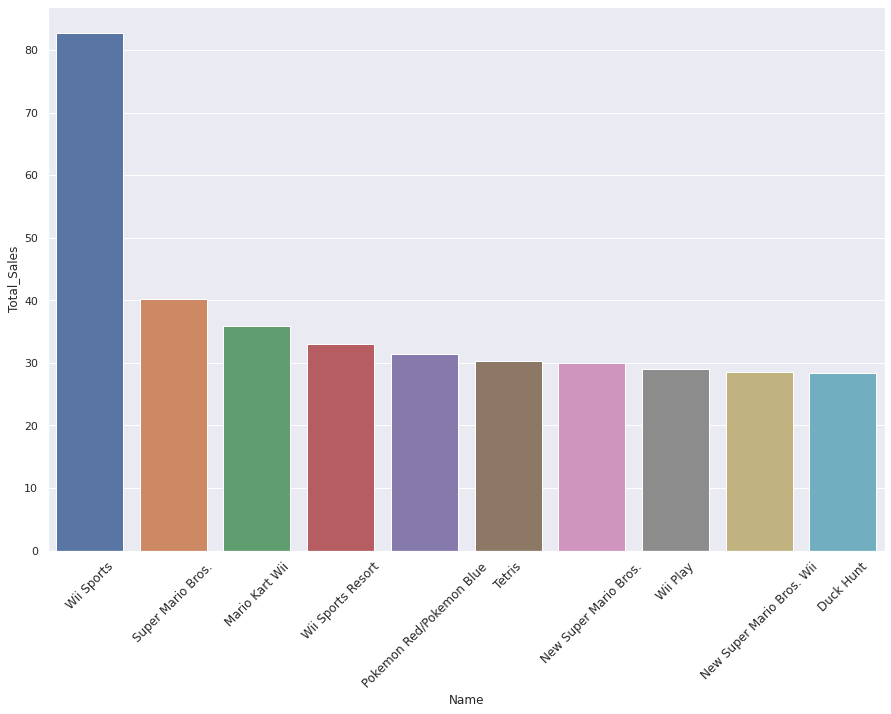

In [15]:
plt.figure(figsize=(15, 10))
g = sns.barplot(data = topten_game, x = "Name", y = "Total_Sales")
ax = g

plt.xticks(fontsize=12, rotation=45)
plt.show()

### - 시각화를 통해 출고량 1위는 압도적으로 Wii Sports인 것을 확인할 수 있다.
### - 출고량 top 10 게임 모두 Publisher가 Nintendo인 것을 확인할 수 있었다.



### 5-3. Wii Sports 지역별 판매량 분석 및 시각화

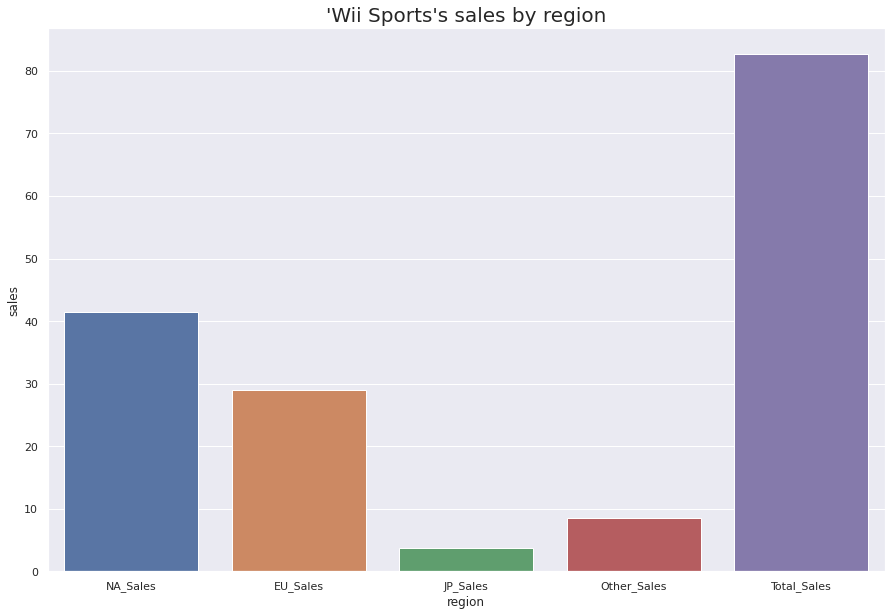

In [16]:
df_1st = df[df['Name'] == 'Wii Sports'].reset_index(drop = True)
df_1st = df_1st.drop(['Year'], axis=1).drop(['Unnamed: 0'],axis=1)
sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.title("'Wii Sports's sales by region", fontsize=20)
plt.xlabel("region")
plt.ylabel("sales")

sns.barplot(data=df_1st);

### - 북미 지역의 판매량이 총 판매량의 절반 이상으로 다른 지역에 비해 높은 것을 알 수 있다.

## 6. 2015년 이후 출시된 게임들의 플랫폼 별 판매량 비교


### 6-1. 2015년 이후 출시된 게임들의 플랫폼과 판매량 나타낸 dataframe 생성

In [43]:
df_plat = df[df['Year'] >= 2015].reset_index(drop = True)
df_plat = pd.DataFrame(df_plat.groupby('Platform')['Total_Sales'].sum())
df_plat = df_plat.reset_index(drop = False)
topten_plat = df_plat.sort_values(by='Total_Sales' ,ascending=False)
topten_plat = topten_plat.head(10).reset_index(drop=True)
topten_plat

,Platform,Total_Sales
0,PS4,152.19
1,XOne,70.03
2,3DS,33.52
3,PS3,20.73
4,WiiU,19.65
5,X360,13.85
6,PC,10.63
7,PSV,10.44
8,Wii,1.56
9,DS,0.29


### 6-2. 데이터 시각화

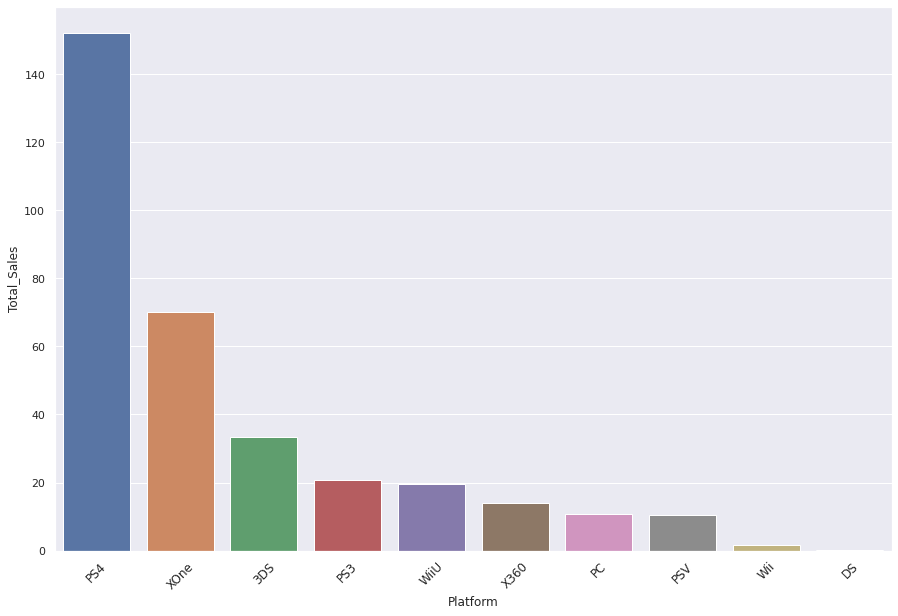

In [44]:
plt.figure(figsize=(15, 10))
g = sns.barplot(data = topten_plat, x = "Platform", y = "Total_Sales")
ax = g

plt.xticks(fontsize=12, rotation=45)
plt.show()

### 6-3. χ2−test 가설검정: 출시한 게임의 플랫폼과 판매량은 연관성이 없다.

In [27]:
obs2 = pd.crosstab(df['Platform'], df['Total_Sales'])
obs2

Total_Sales,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.06,0.07,0.07,0.08,0.08,0.09,0.09,0.09,0.10,0.10,0.11,0.11,0.11,0.12,0.12,0.13,0.14,0.14,0.15,0.15,0.16,0.16,0.16,0.17,0.17,0.17,0.18,0.18,0.19,0.19,0.19,0.20,0.20,...,12.28,12.73,13.04,13.10,13.47,13.52,13.74,14.04,14.24,14.64,14.76,14.97,15.30,15.32,15.84,16.15,16.38,17.28,18.14,18.35,20.22,20.62,20.81,21.39,21.82,22.00,22.72,23.09,23.43,24.75,28.31,28.61,29.01,30.01,30.26,31.38,33.00,35.83,40.24,82.74
Platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2600,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2,0,3,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3DO,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3DS,0,24,27,39,22,13,24,2,2,25,0,16,0,11,2,8,8,0,14,0,10,1,14,1,11,4,4,0,6,1,0,9,1,3,1,0,10,1,3,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DC,0,0,1,0,3,3,4,0,0,2,0,3,0,2,0,0,4,0,1,0,2,0,1,0,3,1,0,0,0,0,0,1,0,1,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DS,0,108,156,134,117,113,84,19,12,51,7,76,0,65,0,54,27,10,68,1,58,2,55,0,53,12,23,0,28,11,1,26,0,11,10,4,29,2,5,15,...,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
GB,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,2,0,0,0,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
GBA,0,52,10,65,52,21,20,0,0,39,0,31,0,1,6,0,13,0,21,0,20,0,2,0,24,14,0,0,13,0,7,0,0,16,0,0,19,0,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GC,0,24,14,11,23,39,0,30,4,2,0,33,0,2,15,0,17,0,19,1,0,2,14,0,18,20,0,0,17,0,0,0,0,0,7,0,0,0,0,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GEN,0,0,0,1,2,2,0,0,0,3,0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
from scipy.stats import chi2_contingency

chi2 = chi2_contingency(obs2)
chi2

(38860.35382219998,
 7.1827567388788175e-236,
 30090,
 array([[7.08084478e-03, 5.36019950e+00, 6.90382366e+00, ...,
         7.08084478e-03, 7.08084478e-03, 7.08084478e-03],
        [1.84717690e-04, 1.39831291e-01, 1.80099748e-01, ...,
         1.84717690e-04, 1.84717690e-04, 1.84717690e-04],
        [3.06631365e-02, 2.32119943e+01, 2.98965581e+01, ...,
         3.06631365e-02, 3.06631365e-02, 3.06631365e-02],
        ...,
        [7.57958254e-02, 5.73774398e+01, 7.39009297e+01, ...,
         7.57958254e-02, 7.57958254e-02, 7.57958254e-02],
        [4.91964780e-02, 3.72417339e+01, 4.79665661e+01, ...,
         4.91964780e-02, 4.91964780e-02, 4.91964780e-02],
        [1.30533834e-02, 9.88141124e+00, 1.27270488e+01, ...,
         1.30533834e-02, 1.30533834e-02, 1.30533834e-02]]))

### 6-4. 결과


*   H0: 출시한 게임의 플랫폼과 판매량은 연관성이 없다.

*   Ha = 출시한 게임의 플랫폼과 판매량은 연관성이 있다.
> **p값이 7.1827567388788175e-236로 0.05보다 작으므로 대립가설을 채택한다.**



# 결과



*   다음 분기에 출시할 게임은 PlayStation을 플랫폼으로 한 Strategy 장르의 게임이 적합해 보임

